
# Deliverable 1 — Data Collection, Cleaning, and Exploration
**Course:** Advanced Data Mining for Data-Driven Insights and Predictive Modeling  
**Repo:** `MSCS_634_ProjectDeliverable_1`  
**Author:** Aryan Shrestha  
**Date:** Nov 1st 2025

## 1. Dataset Selection & Justification
**Dataset:** Breast Cancer Wisconsin (Diagnostic) — available via `scikit-learn`.  
**Records:** 569  
**Attributes:** 30 numeric features + target  
**Domain:** Healthcare (binary diagnosis: malignant vs benign)  

**Why appropriate?**
- Meets size requirement (>500 records) and attribute requirement (30 continuous features).
- Real-world healthcare context commonly used for data mining and ML benchmarking.
- Rich feature set enables exploration of distributions, correlation, outliers, and relationships that guide later modeling (regression, classification).
- Self-contained loader via `sklearn.datasets`, so no external downloads are required.

> Note: While this dataset is relatively clean (few/no missing values, consistent types), we still document and demonstrate standard **data cleaning checks** and **EDA** techniques applicable to noisier real-world datasets. Where appropriate, we include **templates** (e.g., imputation stubs) to show how we would handle missingness if present.


In [19]:

# === Setup ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer

# Plot settings: keep defaults (no custom colors/styles)
plt.rcParams.update({'figure.figsize': (6.5, 4.0), 'axes.grid': True})
pd.set_option('display.max_columns', 100)


In [20]:

# === 2. Load the dataset and inspect structure ===
data_bunch = load_breast_cancer()
X = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)
y = pd.Series(data_bunch.target, name='target')  # 0 = malignant, 1 = benign

df = pd.concat([X, y], axis=1)

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nTarget classes:", dict(zip(data_bunch.target_names, np.bincount(y))))
print("\nHead:")
display(df.head(10))


Shape: (569, 31)

Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Target classes: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}

Head:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0



## 3. Data Cleaning
We perform standard cleaning steps:

- **Missing values:** Check presence; if present, we would use `SimpleImputer` (mean/median for numeric) or domain-guided methods.
- **Duplicates:** Check for duplicate rows and remove them if found.
- **Inconsistent/noisy data:** Identify extreme outliers and consider capping (winsorization) or transformation. We keep the raw data intact for transparency and record any changes.


In [21]:

# 3.1 Missing values check
missing_per_col = df.isna().sum().sort_values(ascending=False)
print("Missing values per column (descending):\n")
print(missing_per_col.head(15))

total_missing = df.isna().sum().sum()
print("\nTotal missing values in dataset:", total_missing)

# Template: how you would impute if needed (not applying unless missingness exists)
if total_missing > 0:
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    print("Applied median imputation to numeric columns due to detected missingness.")
else:
    print("No missing values detected. Imputation not applied.")


Missing values per column (descending):

mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
worst texture              0
worst radius               0
fractal dimension error    0
symmetry error             0
concave points error       0
dtype: int64

Total missing values in dataset: 0
No missing values detected. Imputation not applied.


In [22]:

# 3.2 Duplicates check
dup_count = df.duplicated().sum()
print(f"Duplicate rows detected: {dup_count}")
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed.")
else:
    print("No duplicates detected.")


Duplicate rows detected: 0
No duplicates detected.


In [ ]:

# 3.3 Outlier/noise identification (basic z-score rule of thumb)
# Note: This is a heuristic to flag potential outliers—not a definitive judgment.
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('target', errors='ignore')

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std(ddof=0))
# Flag entries where any feature has |z| > 3
potential_outliers_mask = (z_scores > 3).any(axis=1)
potential_outlier_count = potential_outliers_mask.sum()
print("Potential outliers flagged (|z| > 3 on any feature):", potential_outlier_count)

# Keep data intact here; if we were to cap/winsorize, here's a template:
def winsorize_series(s, lower_q=0.01, upper_q=0.99):
    low, high = s.quantile(lower_q), s.quantile(upper_q)
    return s.clip(lower=low, upper=high)

# Example (not executed by default):
# df_wins = df.copy()
# for col in numeric_cols:
#     df_wins[col] = winsorize_series(df_wins[col], 0.01, 0.99)

Potential outliers flagged (|z| > 3 on any feature): 74



## 4. Exploratory Data Analysis (EDA)
Goals:
- Understand univariate distributions (histograms).
- Inspect outliers (boxplots).
- Examine pairwise relationships and correlations.
- Compare key features across classes (malignant vs benign).


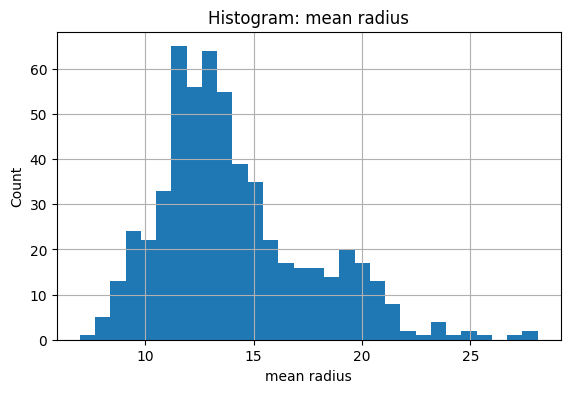

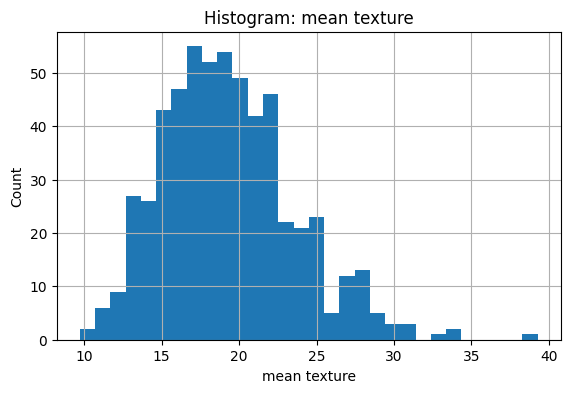

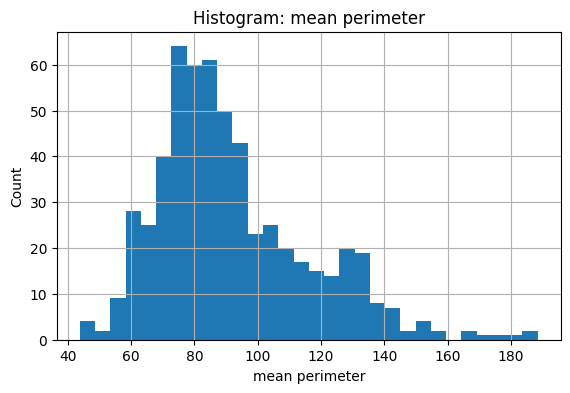

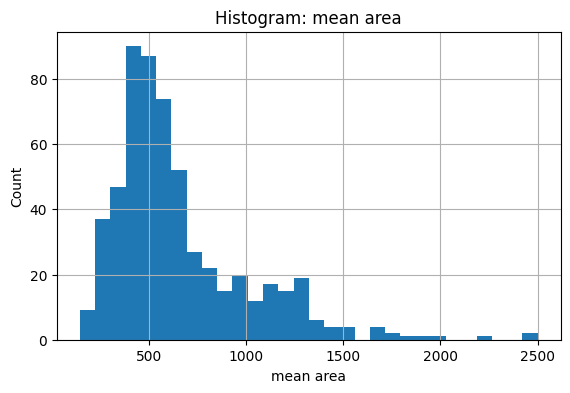

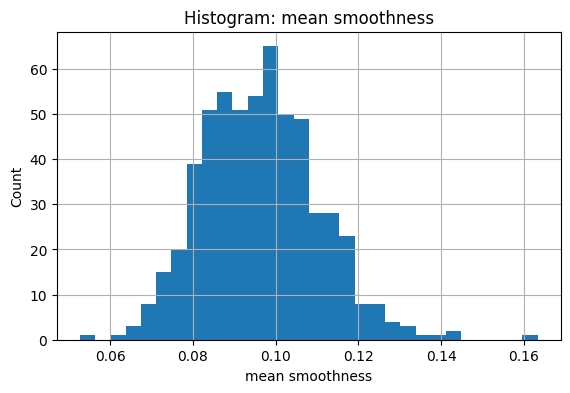

In [24]:

# 4.1 Histograms for a subset of informative features
subset_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
for col in subset_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


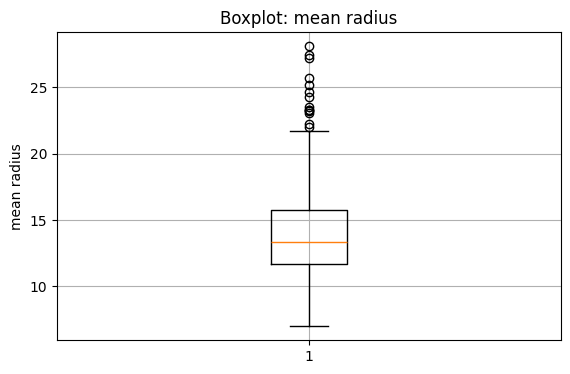

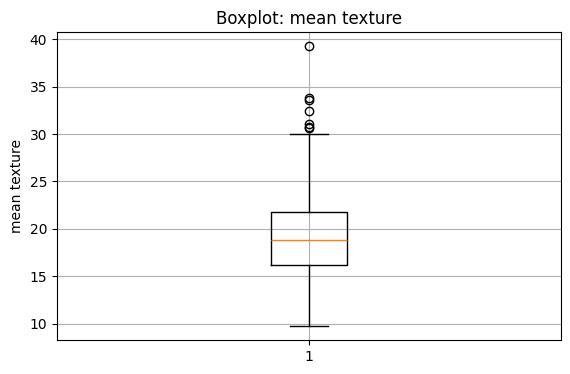

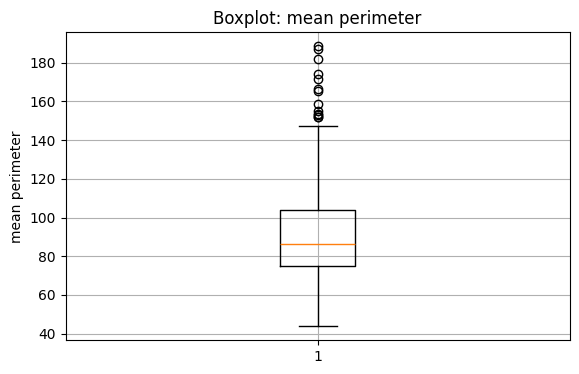

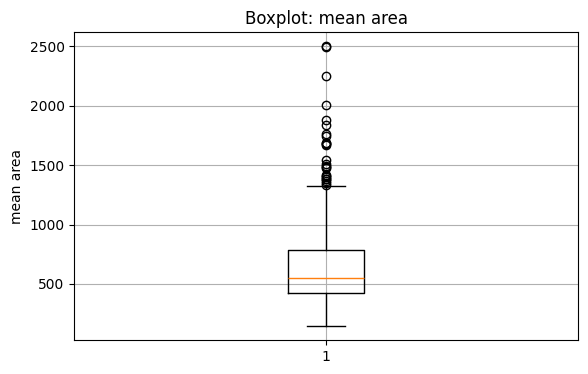

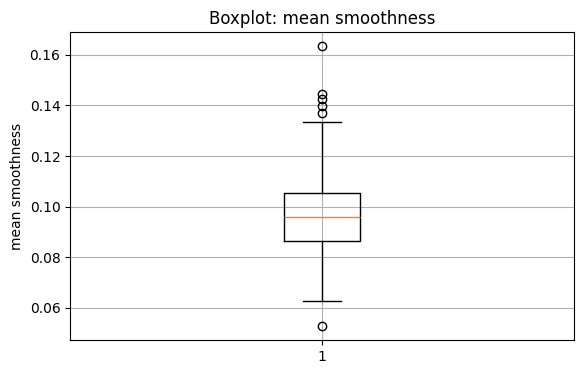

In [25]:

# 4.2 Boxplots to visualize potential outliers
for col in subset_cols:
    plt.figure()
    plt.boxplot(df[col], vert=True, patch_artist=False)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.show()


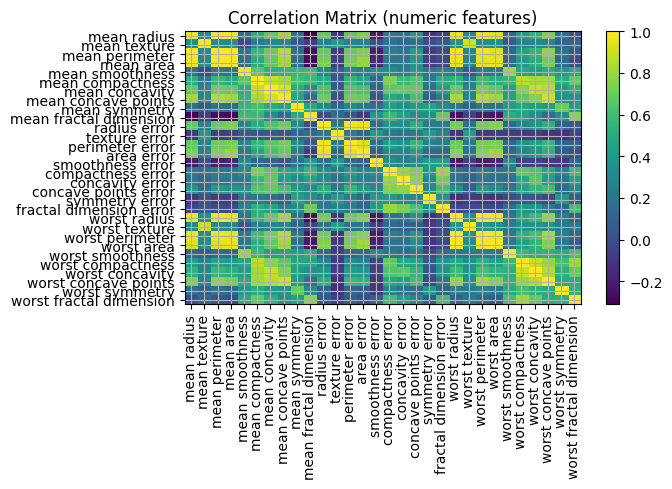

Top 10 absolute correlated feature pairs:
mean perimeter   mean radius        0.997855
mean radius      mean perimeter     0.997855
worst perimeter  worst radius       0.993708
worst radius     worst perimeter    0.993708
mean radius      mean area          0.987357
mean area        mean radius        0.987357
                 mean perimeter     0.986507
mean perimeter   mean area          0.986507
worst radius     worst area         0.984015
worst area       worst radius       0.984015
dtype: float64


In [26]:

# 4.3 Correlation matrix (numeric features only)
corr = df[numeric_cols].corr()
plt.figure(figsize=(7, 5))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title("Correlation Matrix (numeric features)")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()

# Identify top correlated pairs (absolute value), excluding self-correlation
corr_unstack = corr.abs().where(~np.eye(corr.shape[0], dtype=bool)).unstack().dropna()
top_pairs = corr_unstack.sort_values(ascending=False).head(10)
print("Top 10 absolute correlated feature pairs:")
print(top_pairs)


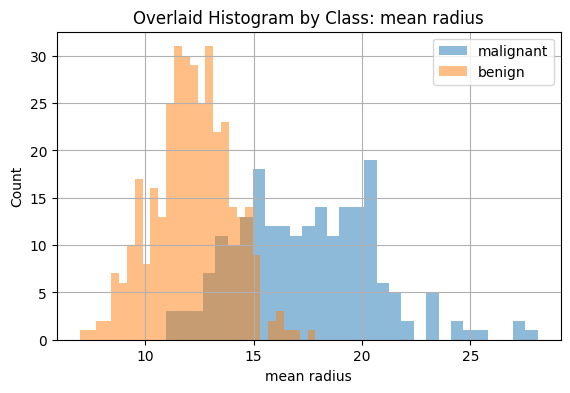

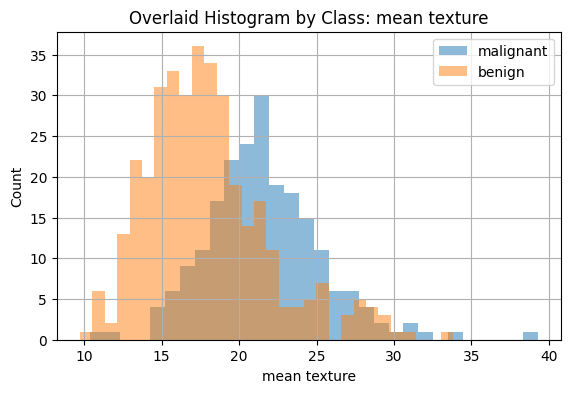

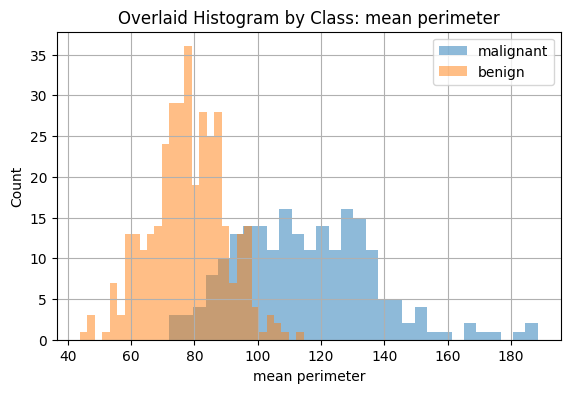

In [27]:

# 4.4 Compare distributions by class (malignant vs benign) for selected features
# We'll plot overlaid histograms per class using simple subsetting.
label_map = {0: "malignant", 1: "benign"}
df['target_label'] = df['target'].map(label_map)

for col in subset_cols[:3]:
    plt.figure()
    for target_val in [0, 1]:
        df[df['target'] == target_val][col].plot(kind='hist', bins=30, alpha=0.5)
    plt.title(f"Overlaid Histogram by Class: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(["malignant", "benign"])
    plt.show()



## 5. Insights & How They Guide Modeling
**Example observations:**
The exploratory data analysis provided several important insights that will directly guide the next stages of modeling. The histograms revealed that features such as **mean radius**, **mean perimeter**, and **mean area** show clear separation between malignant and benign cases, indicating strong predictive potential for classification. The correlation matrix highlighted significant inter-feature relationships—particularly among size-related attributes suggesting possible **multicollinearity**, which will need to be addressed through feature selection, dimensionality reduction (e.g., PCA), or regularization techniques in regression models. Outlier detection using z-scores identified a few extreme observations, implying that **robust scaling** or **tree-based models**, which are less sensitive to outliers, may be more appropriate in subsequent analyses. Although no missing values were found, maintaining imputation steps in the preprocessing pipeline ensures adaptability to future datasets that may contain incomplete records. Overall, these findings will influence both **model design** and **validation strategy**, beginning with regularized logistic regression as a baseline and extending to more complex, tree-based classifiers. To account for potential class imbalance, stratified data splits and evaluation metrics such as ROC-AUC and precision–recall will be prioritized in later deliverables.




## 6. Reproducibility Notes
- Python ≥ 3.9
- See `requirements.txt` for exact packages.
- This notebook uses only offline, packaged data via `sklearn.datasets`.